In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import os

In [13]:
# Check if output directory exists, if not, create it
output_directory = '../Charts and Graphs Output'
os.makedirs(output_directory, exist_ok=True)


In [14]:
# Load dataset
df = pd.read_csv('../Data File Repository/Combined_Rental_Median_Price_Inventory.csv')


In [15]:
# Preprocess data: Melt and create a year column
df = df.melt(id_vars=['Borough'], var_name='Year_Rentals', value_name='Value')
df[['Year', 'Type']] = df['Year_Rentals'].str.extract('(\d{4}) (Total Rentals|Median Rent)')
df.drop('Year_Rentals', axis=1, inplace=True)
df['Year'] = pd.to_numeric(df['Year'])
df['Value'] = pd.to_numeric(df['Value'].replace('[\$,]', '', regex=True), errors='coerce')


In [16]:
# Separate into a DataFrame for Median Rent
df_median = df[df['Type'] == 'Median Rent'].drop('Type', axis=1)


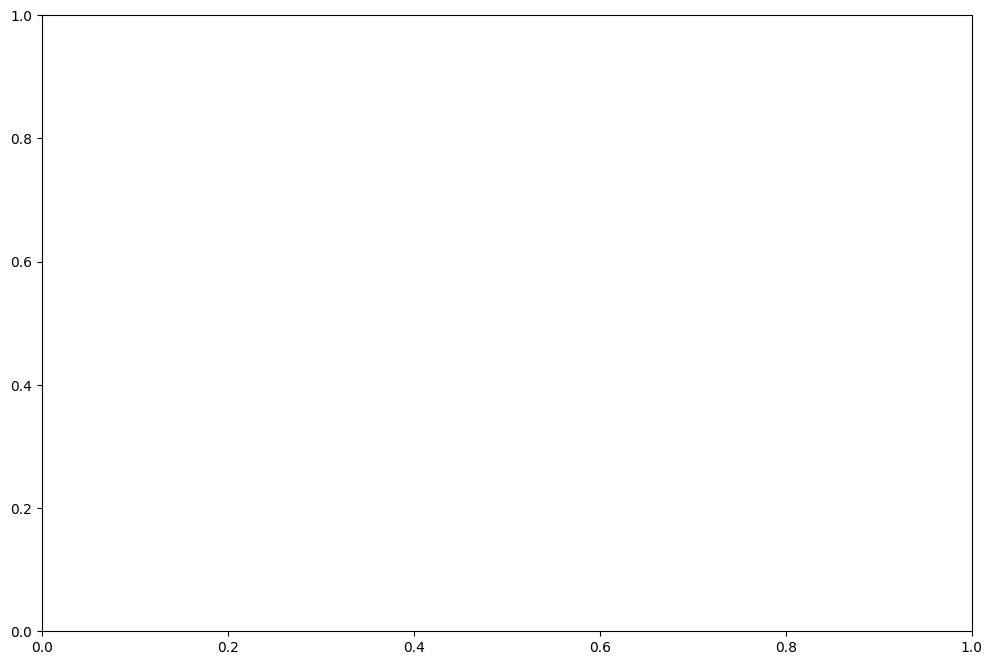

In [17]:
# Start a new figure for combined chart
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']  # Example color list for differentiation


In [23]:
# Iterate over each borough to add to the combined chart
for index, borough in enumerate(df['Borough'].unique()):
    # Check data for the current borough
    borough_median = df_median[df_median['Borough'] == borough]
    print(f"Data for {borough}:\n{borough_median}\n")  # Debug print to ensure data is loaded

    # Filter data up to 2019 to create a trend projection
    pre_2020 = pre_2020[pre_2020['Value'] > 0]  # This removes rows where the 'Value' is less than or equal to 0

    X_median = pre_2020[['Year']]
    y_median = pre_2020['Value']
    model_median = LinearRegression().fit(X_median, np.log(y_median))  # Now y doesn't have zero or negative numbers
    X_median_predict = pd.DataFrame({'Year': range(2010, 2020)})
    y_median_predict = np.exp(model_median.predict(X_median_predict))  # Predict and then exponentiate to go back to original scale

        # Plotting the trend line for Median Rent
        ax.plot(X_median_predict['Year'], y_median_predict, color=colors[index % len(colors)], linestyle='-', linewidth=2, label=f'Trend ({borough})')

        # Plot all actual data for Median Rent
        ax.scatter(borough_median['Year'], borough_median['Value'], color=colors[index % len(colors)], label=f'Actual ({borough})')


IndentationError: unexpected indent (3812067677.py, line 17)

In [19]:
# Set the y-axis to a logarithmic scale
ax.set_yscale('log')

In [20]:
# Setting title and labels for the plot
ax.set_title('Median Rent Data Across Boroughs (Projection and Actual)')
ax.set_xlabel('Year')
ax.set_ylabel('Values (log scale)')
ax.legend()

In [21]:
# Save the figure to the specified directory
plt.savefig(f"{output_directory}/Combined_Boroughs_Median_Rent_Chart.png")


<Figure size 640x480 with 0 Axes>

In [22]:
# Close the figure to free memory
plt.close(fig)